In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Carregar um arquivo CSV para um DataFrame
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')

In [28]:
# Visualizar informações sobre o DataFrame colunas, tipos de dados e memória usada
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [29]:
#Apresentar as 10 primeiras linhas do DataFrame
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


### Engenharia de Fetures

In [30]:
# Engenharia de Features, remover colunas que não serão utilizadas
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [31]:
# Confere se as colunas foram removidas
df_exames.head(1)

,genero,idade,peso,altura,resultado
0,M,46,83,165,98


In [32]:
# Converter uma variável categórica em numérica (genero) usando One Hot Encoding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [33]:
# Confere se a coluna foi convertida
df_exames.head(1)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1


### Visualização de Dados

<Axes: >

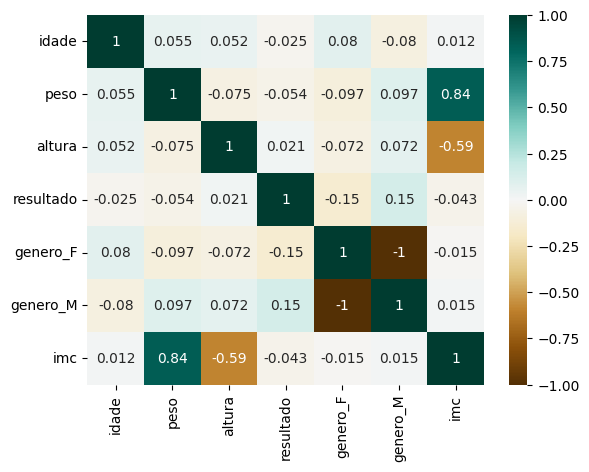

In [40]:
# Apresentar um Mapa de Calor com a correlação entre as variáveis
sns.heatmap(df_exames.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='BrBG')

<Axes: >

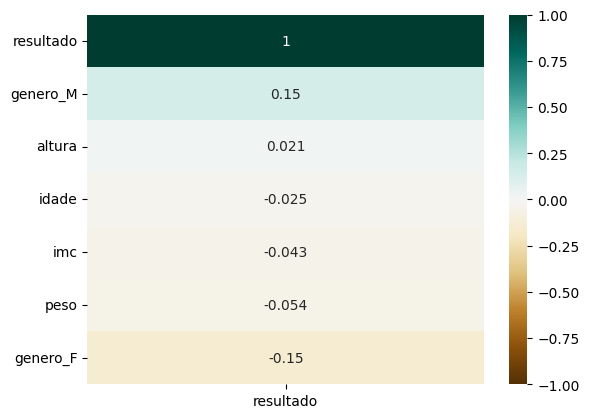

In [41]:
# Mapa de Correlação só com a variável target ( resultado )
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado',ascending=False), annot=True, vmin=-1, vmax=1,cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

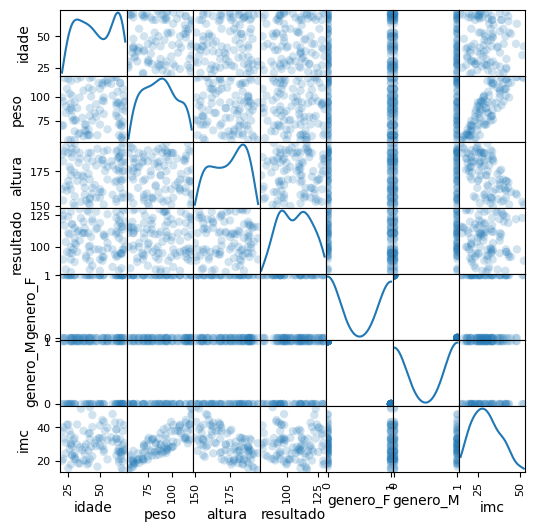

In [42]:
# Plot de Scatter (Dispersão) com Distribuição usando Pandas
pd.plotting.scatter_matrix(df_exames, figsize=(6,6), diagonal='kde', marker='o', alpha=0.2)


array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

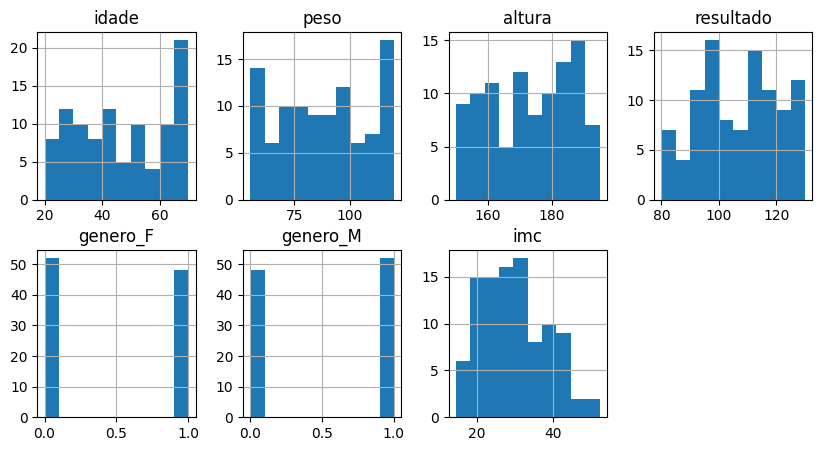

In [44]:
# Histograma de todas as variáveis
df_exames.hist(layout=(2,4),figsize=(10,5))

### Criação de Feature 


In [39]:
#IMC (Índice de Massa Corporal) = peso (KG) / altura (M) ^2 
df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura']/100) ** 2))

### Regressão Linear

In [45]:
# Apenas para estudar a regressão linear vamos criar um DataFrame com dados fictícios
dict_regressao = {'tempo_casa': [1,2,6,9,10,14,18], 'salario': [1500,3000,4500,6000,7000,8500,10000]}

In [47]:
df_regressao_simples = pd.DataFrame.from_dict(dict_regressao)

<Axes: xlabel='tempo_casa', ylabel='salario'>

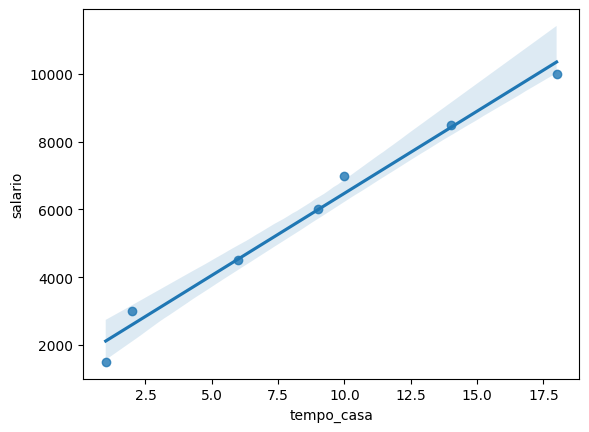

In [48]:
sns.regplot(x='tempo_casa', y='salario', data=df_regressao_simples)

### Treinamento de Modelos

In [49]:
# Importar biblioteca para Regressão Linear do sklearn
from sklearn.linear_model import LinearRegression
# Importar biblioteca para dividir o dataset em treino e teste
from sklearn.model_selection import train_test_split
# Importar biblioteca para avaliação de modelos
from sklearn.metrics import mean_absolute_error, r2_score

#### Modelo 1 - Sem IMC (Regressão Linear Multipla)

In [57]:
# Modelo 1 - Sem IMC
# Uma convenção é usar X para as variáveis independentes e y para a variável dependente (target)
X = df_exames.drop(columns=['resultado', 'imc'], axis=1)
y = df_exames['resultado']

In [59]:
# Dividir o dataset em treino e teste usando 30% para teste e 70% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=51)

In [60]:
len(X_train), len(X_test)

(30, 70)

In [61]:
# Treinar o algoritimo de Regressao Linear - Modelo 1
# Informamos os dados de treino para o modelo usando os splits de treinamento.
model_1 = LinearRegression().fit(X_train, y_train)

In [62]:
# Fazer previsões usando o modelo treinado - Modelo 1
# Usando o conjunto de teste, fazemos previsões sobre a variável target.
y_pred = model_1.predict(X_test)

In [64]:
# Equação da reta 
# y = ax + b
# Para cada variável independente (x) temos um coeficiente (a) e um intercepto (b)
model_1.coef_, model_1.intercept_

(array([ 0.16800999,  0.04991879,  0.24968347,  1.86191691, -1.86191691]),
 51.13503662968273)

### Métricas do Modelo 1

In [66]:
# R2 Score - Modelo 1
# O R2 é uma métrica que indica o quão bem as variáveis independentes explicam a variável dependente.

# No conjunto de treinamento
model_1.score(X_train, y_train)

0.07260818476640707

In [67]:
# R2 Score - Modelo 1
# No conjunto de teste
model_1.score(X_test, y_test)

-0.2639179004021748

In [68]:
# MAE (Mean Absolute Error) - Modelo 1
# O MAE é a média das diferenças absolutas entre previsões e valores reais.
mean_absolute_error(y_test, y_pred)

13.466664869862774

#### Modelo 2 - Com IMC (Regressão Linear Simples)

In [70]:
# Segundo modelo apenas IMC
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [72]:
# Dividir o dataset em treino e teste usando 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=51)

In [73]:
# Treinar o algoritimo de Regressao Linear - Modelo 2
model_2 = LinearRegression().fit(X_train, y_train)

In [74]:
# Gerar previsões - Modelo 2
y_pred = model_2.predict(X_test)

#### Métricas do Modelo 2

In [76]:
# R2 Score no conjunto de treinamento - Modelo 2
model_2.score(X_train, y_train)

0.004837831252090474

In [77]:
# R2 Score no conjunto de teste - Modelo 2
model_2.score(X_test, y_test)

-0.027018925594941123

In [78]:
# MAE (Mean Absolute Error) - Modelo 2
mean_absolute_error(y_test, y_pred)

12.247767098480901

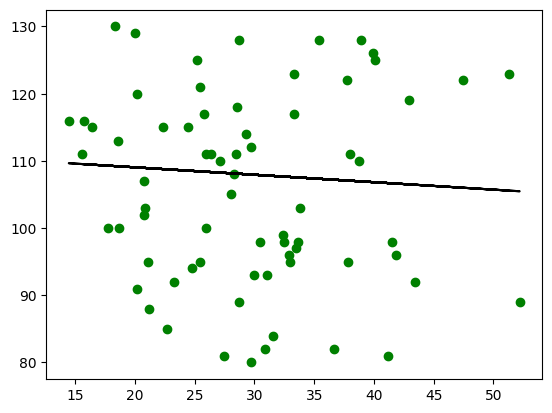

In [87]:
# Como o modelo 2 é uma regressão simples podemos plotar a reta
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color='k')